In [1]:
import konlpy

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 확인

In [3]:
import csv
f = open('new_file.csv','r', encoding = 'UTF-8-sig')
rdr = csv.reader(f)
for line in rdr:
    print(line)
f.close()

['0', '요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다', '1']
['1', '저 짧은 몇 마디에서 인성이 보이넴 ..', '1']
['2', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '1']
['3', '정신분열 잼 ㅋㅋㅋ', '1']
['4', '실력에비해 오래갔다', '1']
['5', '거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가?', '1']
['6', '점점... 왜저러냐 리더라는게 맨날 표정관리 못하고 기분에 따라 행동하고말하는거 진짜 별로다', '1']
['7', '말하는거 저급해...', '1']
['8', '말투가 왜저래ㅋㅋ', '1']
['9', '아무리 그래도 그렇지 말투가 저게 뭐냐;', '1']
['10', '왜저래 비꼰데?? 힘들면 그냥 조용히 탈퇴하세요~ 요즘 보면 얼굴도 어둡고 기분대로 행동하고 표정 다 드러내더만 이제 내리막길 ..다들 얼굴에 생기가 없고 초심도 잃은거 같고 ..배부르지?? 그만하고 쉬어라 다들 ..팬 많지? 금방 썰물처럼 다 휩쓸려간다 ~너희 아무것도 아니다~ 배부른 소리하고 자빠졌네 ~비호감이네 진짜', '1']
['11', '아무리봐도 잘못 뽑은 것 같다', '1']
['12', '인기있을때 높은곳에 있을 때 말을 좀 조심할 필요가 있을 거 같네요 표현이 참;;;', '1']
['13', '인기도 좋고 다 좋은데 말투가 왜 그래요 어린 팬들도 많은 사람이', '1']
['14', '진짜 예민하네;', '1']
['15', '와...좀 깨긴 깬다 스트레스여서 그럴 수도 있는데 그래도 라이브 동영상에서 저런 말을 했다는게....당신이 그 자리에 앉아있는 것도 그런 관심 때문인 것을....ㅉㅉ', '1']
['16', '윽..진짜 말투 이런다고???', '1']
['17', '말 더럽게 싸가지 없게 하네ㅋㅋㅋㅋㅋ 니 성격대로 

['1977', '길거리 다니다가 뒷통수 벽돌로 박살나거나 집단으로 폭행당해도 감내해야되 알았지?? 이건 너가 시작한거야', '1']
['1978', '앞날이 암울하네', '1']
['1979', '새콤달콤 포도맛 씹다 뱉은거 같이 생겼네', '1']
['1980', '곧 사라질 관상 운명 같은데', '1']
['1981', 'ㅋㅋㅋㅋㅋㅋㅋㅋ 야이 씹얼 개소리 좀 안나게해라', '1']
['1982', '한남들 수준 ㄷ ㄷ 어휴', '1']
['1983', '정신나간것들이 한둘이 아니네~~너네 부모님은 이런거 아시니?', '1']
['1984', '니 얼굴이 더 아니거든??', '1']
['1985', '머야 욕즘 먹어보고싶은거야?ㅎ 여기 댓글 난리났네ㅎ 정신병자 쓰레기 ㅈㅅ해라ㅎㅎ 이거 읽으면서 무슨 생각할지 개궁금ㅎ', '1']
['1986', '저 진따는 어떻게 방송 나왔냐', '1']
['1987', '인물이왜그래 어디 갈았나? 얼굴도아픈거같고 정신도아픈것같구 니도참불쌍하다', '1']
['1988', '왜저리 못생긴 감자같이 생겼니 ', '1']
['1989', '말안해도 얼굴만으로도 충분히 어그로 끄니깐 닥치고 있어라', '1']
['1990', '몇대 쥐어박고 싶게 생겼네 불량감자 새퀴', '1']
['1991', '불량감자같이 생겻누', '1']
['1992', '도라이 쉑!!!! 그럴시간에 군대가라~~', '1']
['1993', '요다닮았네. 인생 못살겟다', '1']
['1994', '와 미쳤나봐', '1']
['1995', '존나한남..', '1']
['1996', '하여간  이나라는 쓰레기 천국 이다.  정상인 찾기 진짜  힘들다.', '1']
['1997', '진짜 미쳤다..', '1']
['1998', '물고기처럼 생겼네', '1']
['1999', '자식교육 개판으로 해놓니까 저모양이지', '1']
['2000', '생긴 대로 사고한다.어휴...인간아', '1']
['2001', '병원가봐라  ㅉㅉㅉ', '1']
['2002', '

['3977', '안이뻐요 사람같지가 않아 인간미가 없어', '1']
['3978', 'ㅆ돼지됐네', '1']
['3979', '지옥가라 지옥가', '1']
['3980', '무섭게 생겼어 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '1']
['3981', '예쁘긴 개뿔~ 제발 그만 올려라', '1']
['3982', '꼭지가 섹시한지 아닌지 확인할수 없어 아쉽구먼', '1']
['3983', '꼭지가 안이쁘잔아!!', '1']
['3984', '관상이 별로네....인상이... 서방 거시기 할상이다.', '1']
['3985', '예쁘긴모가이뻐ㅡ섬뜩해', '1']
['3986', '이제 얘봄 찌찌생각만나 ㅋ', '1']
['3987', '진짜 정신세계 궁금함', '1']
['3988', '눈이풀렸네 뭐가이쁘노그만좀나온나', '1']
['3989', '이분 .... 좀  더 오바하는거 같아 ....', '1']
['3990', '무서워 ㅠㅠ', '1']
['3991', '뚱뚱하고 못생기고 성격도 안좋아', '1']
['3992', '누가 쟤 핸드폰좀 빼서라', '1']
['3993', '인간 표독 그 자체', '1']
['3994', '더러운년', '1']
['3995', '좀  이상한 애', '1']
['3996', '얘도 자살하려나??', '1']
['3997', '관심종자', '1']
['3998', '얘 휴대폰 좀 뺏어라', '1']
['3999', '주위에 누구없나 인터넷못하게먹아라 ', '1']
['4000', '완전 ㄸㄹㅇ네', '1']
['4001', '감정폭력자', '1']
['4002', '그냥 누구 편도 아닌데 정상같지는 않아보임 진심', '1']
['4003', '(일산병원정신과031-900-0114)(성안드레아 신경정신병원031-639-3700)(용인정신병원031-288-0114)(가족사랑 서울 정신과 의원 02-2068-7486)(송신경정신과의원02-734-5648)(신경정신과의원02-517-9152)(동민신경정신과02-353-2325)(솔빛정신과의원0

['5976', 'ㅆㅂ이게뭐냐', '1']
['5977', '참 읍써보이네 잉', '1']
['5978', '아줌매 ~~운동 열심히하고 해도 40대는 40대요', '1']
['5979', '팔자 좋구나...', '1']
['5980', '아 맛있겠다 ', '1']
['5981', '디질래?', '1']
['5982', '싸다싸', '1']
['5983', '아 18 개똥대갈들', '1']
['5984', '못생김. 노출증.', '1']
['5985', '늙는구나…', '1']
['5986', '무슨 나가요도 아니고 아나운서가 체통을 지켰으면아래부터 훑어찍으니 더 나가요 같음', '1']
['5987', '왜저럴까 이쁘지도않는데', '1']
['5988', '업소녀 ...??', '1']
['5989', '이쁜 관종 맘충', '1']
['5990', '에혀ㅉㅉㅉ', '1']
['5991', '누구냐 넌?', '1']
['5992', '듣보인데..', '1']
['5993', '아짐마야.. 이러지말자..  이게 뭔꼴이냐', '1']
['5994', '관종스러워 추하다 실제는 저렇지 않다는', '1']
['5995', '먹고싶다... ', '1']
['5996', '정신차려', '1']
['5997', '예전에 어느 방송에서 남편이 살짜는걸 싫어하고 조금이라도 찌면 바로 경고한다는 말하는거 보고 와장창 깸. 역시 끼리끼리~', '1']
['5998', '보기는 좋은데 관종삘이 많이남.', '1']
['5999', '어우야 너무 대놓고 이러는 건 좀...', '1']
['6000', '한순간에 오징어 되네', '1']
['6001', '뉴규????저게 머가 이뻐보이는건지 ~남자들아 저게 이쁘거니 ???', '1']
['6002', '아줌마 조신하셔야죠', '1']
['6003', '수영복은 수영복이니까 괜찮은데 원피스 입고 굳이 저런각도에서 사진 찍어서 스스로 올리는 이유는 뭘까... 엉덩이 보여요 아주머니', '1']
['6004', '허벅지조아여', '1']
['

['7976', '제일 좋아하는 지민이', '0']
['7977', '존경받는 아티스트 세계최고 아티스트', '0']
['7978', '존경스러운 지민', '0']
['7979', '존경스럽다', '0']
['7980', '존경이라는 단어가 무색하지 않은 아티스트 지민 사랑합니다', '0']
['7981', '존경하고 감사합니다 무대가 정말 아름다워서요 예술쪽 일하는 사람으로 정말 감탄합니다', '0']
['7982', '존재만으로도 큰 선물인 내 가수', '0']
['7983', '존재자체가 보물이자 보석 사랑스러운 매력덩어리💜', '0']
['7984', '좋아하는 일을 노력을 해서 성공한모범답안 무대 위에서는 멋지고 무대 아래에서는 순수한 이십대 청년의 모습을 보아서 그런지 아주 가깝게 느껴지네요.늦덕이라 모든게 다 신기함', '0']
['7985', '주변 동료 지인이 칭찬일색인지민이는 진짜에요', '0']
['7986', '주위 사람들에게 한없이 다정한 사람,,, 그러나 본인에게는 정말 엄격한거 같아요. 본인이 만족할때까지 연습에 또 연습,,, 그 연습량이 지금의 지민을 만든것이기에 응원해요!!🉑️🉑️', '0']
['7987', '지금 이순간이 오기까지 너무 수고 많았고, 그 겸손함과 선함에 박수를 쳐주고 싶네요!!!내가수 최고💛', '0']
['7988', '지금까지의 노력이 있었기에  최고가 될수있었지 너의 재능과 열정을 항성 응원할게', '0']
['7989', '지금도  더욱 노력하여 현대무용 팝핀 댄스들이 점점 우아하면서 환상적으로 잘하게 되어 언제나 몸선과 근육도 아름답고 시상식이나 아이돌 무대를 하나의 예술의 전당으로 만들기도하는 천재 무형문화재이다💖💖 하지만 그만큼 위험하고 힘든 춤을 오래추다보니 근육통 만성통증으로 고생하는데 무대도 좋지만 몸도 재산이니 아프지않게 건강 먼저 꼭 챙겼으면 좋겠다', '0']
['7990', '지금도 너무 넘치게 좋은 사람인데, 더 좋은사람이 되겠다는 소중하고 순수한 마음을 지켜주고 싶다 오래오래 함께하

['116', '피부가 어쩜 그리 고운가요ㅠㅠㅠ부러워여', '0']
['117', '독보적인 매력과 아우라가 이렇게 쩌는데. 부럽다...', '0']
['118', '이뿌네예 ㅎ', '0']
['119', '앞으로 꽃길만 걷고 더큰 배우가 되었으면 좋겠다.', '0']
['120', '매력적임..', '0']
['121', '이런얼굴이 다양한 역할하기 좋은 천의얼굴이다.', '0']
['122', '정말많이세련되어졌다', '0']
['123', '뭔가 독보적인 분위기가있음', '0']
['124', '딱 어느 세대라고 말하기 묘하다 예쁨', '0']
['125', '고전 미인 ㅠㅠ ', '0']
['126', '함부로 범접할수없는듯한 표정연기', '0']
['127', '앞으로가 기대되는배우입니다', '0']
['128', '완전 세련되고 분위기 있는 느낌~', '0']
['129', '너무예뻐ㅠ', '0']
['130', '뭔가 질리지 않는 마스크.. 보면 기분 좋아지는 느낌입니다. 오래오래 보여주세용~', '0']
['131', '참신한 마스크', '0']
['132', '경쟁자나 라이벌이 없는 스타일임. 딱히 누구랑 비슷하지도 않고 비교대상도 없음. 이목구비가 개성있고 연기력이 독보적이니 아주 크게될 인물이오', '0']
['133', '너무 이쁘다', '0']
['134', 'ㅎㅓ억 진짜 넘 매력있다 아름답다 ♡', '0']
['135', '너무 분위기있어', '0']
['136', '진짜 연기도 잘하구', '0']
['137', '개쩐다....분위기가 존나 아름다움ㅠㅠ', '0']
['138', '나의최애배우', '0']
['139', '매력있게 이쁘다', '0']
['140', '진짜 이쁘다 ㅋㅋㅋㅋ', '0']
['141', '너무 이뻐요 ', '0']
['142', '정말 분위기 여신이다. 발음과 발성부터 연기력까지 어느 하나 빠지지 않고 너무 매력있는 배우', '0']
['143', '신선한마스크', '0']
['144', '너무 좋아..', 

['36', '나만 얼굴 무서운거 아니죠??', '1']
['37', '인조인간이다.무셔ㅜㅜ', '1']
['38', '눈 사시 같다.성형 하고도 거부감 드는 얼굴이다.', '1']
['39', '눈.과다해서 조금 무섭네요.', '1']
['40', '헐 눈을 어뜨케힌건가요? 어우 못보겠다 어떡하니 저 여자...', '1']
['41', '중국에 성형중독돼서 바비인형 따라한 그 여자같아요...', '1']
['42', '야 솔직히 징그럽다  ㅋ  성형을 저렇게 많이하냐?  적당히 해라', '1']
['43', '얼굴 너무 심하다', '1']
['44', '눈이...왜 저런거야?? 무서운데...', '1']
['45', '여자누군지는모르겠으나  진짜 징그럽게생김', '1']
['46', '난 성형에 관대한 편이라고 생각했는데 저 눈은 좀 그렇다', '1']
['47', '수술안한눈이라면.저건병이에요.세상에저런병이있다죠.눈만겁나큰무슨병이라던데?그런데저건자연은아닌것같아.', '1']
['48', '성형이 너무 과해', '1']
['49', '세상 혐오스럽다. ', '1']
['50', '인조인간18호냐?', '1']
['51', '뭔가 부자연스러운..... 인조인간 같다...', '1']
['52', '괴물같이 보여요 무서워', '1']
['53', '성형중독', '1']
['54', '여자 얼굴 무섭다ㅠ', '1']
['55', '나만 이상한가 ㅠㅠ 볼수록 무섭다', '1']
['56', '교과서에 나오는 ... 오리지날 강남 얼굴', '1']
['57', '근데 여 눈이 그림이냐 사진이냐..쏟아질라..눈이 어플 이냐..개이상 저런 눈 첨봄..적당히 어플 써라..개징그럽', '1']
['58', '성형티가 너무 많이 남.', '1']
['59', '턱이 송곳이네. 저정도면 불법무기 아닌가~?', '1']
['60', '눈이 좀 이상한데', '1']
['61', '진짜얼굴이야?? 포샵이 과한거야 놀랬네', '1']
['62', '포샵인가 원래 저렇게 생긴건가 신기하

['219', '이분의 말이 심금을 울리는 건 자신을 돋보이려는 자의식과 가식이 느껴지지 않아서인 것 같다.', '0']
['220', '연예인 다큐가 아니라 인간다큐로 감동스런 시간이었다.. 책이 기다려지네', '0']
['221', '팬은 아니지만 말 한마디 한마디 보통 일반적인 사람이 아난거 같다. 얼마나 그동안 많은 생각을 했는지, 스스로 다져지고 철학이 뚜렷한 성숙한 인격체인것이 느껴진다. 그건 꾸민다고 되는게 아니거든.', '0']
['222', '학창시절 수재였는데 저리도 겸손하게 자신은 공부를 못했다고 ㅠㅠㅠㅠㅠ', '0']
['223', '착하게 살아도 복받는다 가 맞네요', '0']
['224', '와 그가수에 그팬이네 저 팬이 찐이네 어쩜 저리말을하지? 자기가좋아하는 가수 다시는안봐도되고 인생이바꼈으면 좋겠다는~~ 찐팬심하나가 사람의인생을바꿨네요', '0']
['225', 'TV보는 내내 행복했어요 화이팅 ~~♡', '0']
['226', '더러운연예계바닥에 저런 청초한꽃한송이가 있으니 신드롬이되는거다 대사한마디 팬들의  모습 이상황 자체가 힐링 드라마네', '0']
['227', '시든꽃에 물을준다라 ..이사람 참  말을 예쁘게 잘한다..이런 말투 옆에 있으면 포근할거 같음.. 요즘 남녀노소 모든분들에게도 좋은말씨가  전염이 좀 됐으면 좋겠다', '0']
['228', '이 기사가 제대로인듯 ‥기자답게 골고루 짜임새있게 잘써주셨네   다른기사보면 방송한소절보고초딩이쓴 수준', '0']
['229', '어디서 이런 연예인을 아니 이런 사람을 만날 수 있을까..여러모로 배울 것이 많고 보는 것 자체가 힐링되네요. 노래도 좋고 정말 미소년같은 미소와 춤선도 넘 이뻐요. 자주 자주 방송에서 보고 싶어요', '0']
['230', '자꾸 중년의 희망이라는데요 청년의 희망이시기도 합니다 =)', '0']
['231', '50대 60대 일부 교양없는 아저씨들과 너무 비교된다사생활 지저분한 일부 연예인들하고도 급이 다르고양준일씨를 보면 깨끗해지는 느낌이

['247', '둘다 관종돌아이들...ㅉㅉ', '1']
['248', '아무리봐도 머리가 이상해..', '1']
['249', '뭐지??  싸~~~하네~~~ 우째  더 없어 보여요..', '1']
['250', '미친×같어... 뽕맞은거같은눈동자에...공포영화보는거같음 저정도면 무서운거야 소름', '1']
['0', '오랜팬으로서 항상 맴버들 바뀌어도 지지해왔고 믿어왔습니다!! 이번 시즌4도 마찬가지에요 !! 다들 의욕이 넘치는게 보기좋고 모처럼 웃었습니다 ^^', '0']
['1', '재탄생  너무너무  축하해요~~^^   신서유기 멤버가  1박2일이였으면 ....  하지만   새멤버  기대해 볼께요~~  잼있어요', '0']
['2', '화이팅^^김종민 파이팅입니다', '0']
['3', '걱정반 기대반이였는데생각보다 재미지게 시간 후딱 지나갔음~~', '0']
['4', '골수팬으로서 의리로 봤는데 생각보다 재밌었다. 딘딘 귀여웠고 새 멤버들 참신했는데 오히려 문세윤이 뭘 자꾸 하려고 하는 리액션이 조금 억지스러웠지만 대체로 다 좋았다.', '0']
['5', '그동안 안좋아해서 그닥 관심없었는데우연히 오늘 시청했습니다  멤버구성 신선하고 연정훈님  이미지  반전이네요 ㅎ 기대됩니다 ^^', '0']
['6', '기다렸어요~ ^^ 아자아자 화이팅 ~', '0']
['7', '1박2일 너무 재미있어요 ㅎㅎ딘딘이 까나리카노 먹는거 보고 놀랬다 앞으로도 기대하겠습니다.1박2일 새로운 맴버들 너무 좋다', '0']
['8', '넘 기다렸어요^^ 응원합니다 넘넘 재밌어요~ 피디님 화이팅입니다^^', '0']
['9', '돌아왔구나', '0']
['10', '라인업 너무 기대되요~^^ 오늘 너무 재미있었어요 화이팅!!!!!!!!!!!!!!!', '0']
['11', '넘 재밌게 봤어요~~', '0']
['12', '애청자였네요ㅎㅎ그래서..더더 아쉬웠죠ㅠ그런데..오늘 드뎌..시작이네요ㅎ일단 신선한 출연진~너무 좋아요ㅎㅎ(갠적으로 좋아하는 님들이 많아서 ㅎㅎ) 요즘 잘

['21', '사랑둥이', '0']
['22', '새해 복 많이 받아!', '0']
['23', '새해 복 많이 받아요 으이잉 귀엽당 폐렴 주의', '0']
['24', '새해 복 많이 받으세요', '0']
['25', '새해 복 많이 받으세요! 올해는 행복과 성공으로 채워질 것입니다', '0']
['26', '새해 복 많이 받으시고,가정에 항상 웃음꽃 피시길 기원합니다. 사랑해 ♥?', '0']
['27', '새해에 복 많이 받으셨는지요? 다시 시작되는 구정을 맞이하여 부디 건강하시어 과 합께 더불어 살아가는 더욱 큰 소망과 함께 만복으로 충만하시기를 진심으로 기원합니다. 사랑해♥?', '0']
['28', '새해에는 더욱 강령하시고, 소망하신 일 모두 이루시길 기원드립니다. 새해 복 많이 받으세요 제니.', '0']
['29', '새해에도 많은 뜻하신 성과 있으시고 건강하시기를 기원합니다. 새해 복 많이 받으세요??', '0']
['30', '아~~ 징짜 귀엽~~ 반려견들까지 너무 예쁘다?', '0']
['31', '아름다운 사람', '0']
['32', '아아아 넘무예쁘고귀여워여~ 해피루나뉴이어~', '0']
['33', '아아아악.. 넘무 귀여워ㅠㅠㅠㅠ', '0']
['34', '엔젤', '0']
['35', '예뻐 예뻐', '0']
['36', '오늘도 멋있고 귀엽고 다 하는 사람', '0']
['37', '오늘도 멋있고 귀엽고 다 하는 사람', '0']
['38', '우리 애긔,,,,ㅠㅠ ㅜㅠ넘무 귀여워 징쨔루,,, 사랑해', '0']
['39', '우리 항상 네 곁에 있을게요 ', '0']
['40', '으이이잉 귀여워~ 새해 복 많이 받으십당. 우한폐렴 주의 주의????', '0']
['41', '이번년엔 행복한일만있자 사랑해?', '0']
['42', '이쁘다ㅠㅠㅠㅠ언니ㅠㅠ', '0']
['43', '인증도 해주고 고마워 ㅎㅎㅎㅎ', '0']
['44', '인형인줄?', '0']
['45', '저 사진 대박 이쁘당', '0']
['46', '저

['1054', '진짜 결말까지 완벽한 드라마 생에처음이에요', '0']
['1055', '진심 내인생작', '0']
['1056', '지상파에서 간만에 멋있고 이쁜? 드라마 시청했네 요즘 사회가 각박한데 이드라마에서는 옛날 어릴때 동네사람들 같은 느낌을 느낄수 있는 아름다운드라마였다', '0']
['1057', '지금까지 이런  엔딩은 없었다작가님과 배우들께 찬사를 보냅니다행복했습니다 ~~~이 드라마 여운으로 앞으로 몇년은 충전되어거뜬히 살아낼것같습니다', '0']
['1058', '지금까지 이런 글 써본적이 없는데 안쓸수가 없네요 ㅠ 정말 최고의 드라마였어여 ㅠㅠ 주연부터 조연들까지 아니 조연이 없는 듯한 드라마는 처음 ?? 그리고 작가님 정말 최고 ??', '0']
['1059', '지금까지 이런완벽한 엔딩은없었다!찝찝함은 일도없는 사려깊은 엔딩이었어요.잘봤습니다~', '0']
['1060', '지금까지 이렇게 완벽한 드라마가 있었던가? 처음부터 끝까지 웃음과 눈물 감동을 선사한 내 인생 최고의 드라마였습니다. 작가님  모든 배우님들 연출감독님 및 스탭분들 모두 너무나 감사합니다！！！', '0']
['1061', '지금까지도 매회 감동이었는디 마지막회가 제일 잼있다니', '0']
['1062', '중간부터 보기 시작했는데... 뭐랄까 뭔가 은근히 기대하게 만드는 그리고 보는 내내 희노애락을 느낄 수 있었던 드라마였습니다 그 캐릭터에 담긴 과거모습도 참 좋았습니다 이 드라마를 위해 고생해주신 모든 분들께 감사합니다 덕분에 즐거웠습니다..??', '0']
['1063', '주연,조연 할 것 없이 다 돋보이고 마지막까지 이렇게 감동적이고 완벽한 드라마 처음 보는것 같아요!! 진짜 최고에요^^', '0']
['1064', '주연은 물론이고 조연 모두 다 매력있고 좋았어요. 엄마, 회장님, 필구와 베프 준기, 향미, 규태, 자영, 옹벤저스, 의사쌤, 간호사님 까지도 다 따수웠던.. 이런 드라마 또 만날 수 있을까 싶네요', '0']
['1065', '좋은 드라마 

['1844', '꼴보기 싫어 관종 듣보잡이 설치누', '1']
['1845', '웩', '1']
['1846', '순진한 제주도청년 코스프레 약쟁이 욕쟁이 여친?', '1']
['1847', '떡 중독 플러스 관종', '1']
['1848', '노잼이다.', '1']
['1849', '힙찔이 사생활 안궁금', '1']
['1850', '첫번째 사진 드럽다', '1']
['1851', 'ㅉㅉ  힙찌지이들..', '1']
['1852', '윽', '1']
['1853', '아 저렇게 살고싶지않다. 정신 제대로 차려야지!!!:)', '1']
['1854', '애 눈빛 진정 요상하네...', '1']
['1855', '둘다 약 했나 눈이 똑같 ㅋㅋ', '1']
['1856', '저건 뭐 하고난 후 찍은건데', '1']
['1857', '조용히 살자,그러면서 악플이니 우울증이니?연예인들 관종이라 답이 없다. 우리만 문제레?', '1']
['1858', '못생겼어 카악퉤 ..', '1']
['1859', '약쟁이기사를 왜자꾸 쓰는거야 알아서 살라고 냅도', '1']
['1860', '약쟁이기도하지만 역겨운건 마치그게 힙합인양 ~', '1']
['1861', '끼리끼리', '1']
['1862', '약쟁이는 뭐다? 거른다', '1']
['1863', '지저분해 보이는건 무엇인가..눈이 해롱해롱~ MA 약 먹은 사람같다.', '1']
['1864', '얘도 제정신 아니고 여친은 더 정상 아니고', '1']
['1865', '집좀 치워라 드럽', '1']
['1866', '몸뚱이들이 무슨 도화지냐...둘이 끼리끼리네', '1']
['1867', '보기불편하다', '1']
['1868', '여자는 돈이 필요  남자는 여자가 필요 천생연분', '1']
['1869', '약 아님? 씨잼 등이나 다리부분에 메스버그는 없는거임?', '1']
['1870', '이번에는 진짜뽕맞았나? 가짜뽕 넣고 맛탱이 간척하기 없기~풉', '1']
['1871', '졸려보이누 약장수', '1']
['

['900', '저 손에 반지 너무 가식스럽네요..', '1']
['901', '너 같은 인간이 젤 싫어깨끗한척 하면서 젤 드러워~~', '1']
['902', '인상보고.뭔일인가 봤더니...관상책 몇번 본 나도...진짜  관상이  과학인가보네..  생각이드네', '1']
['903', '요며칠전 눈빛이별로네라고 생각했는디 ...', '1']
['904', '유부남이던데 뭐하는거냐?? 토나와 ㅠㅠ', '1']
['905', '한상헌 아나운서 참 거지같아요~~', '1']
['906', '진짜 정신 나간놈들인가    한상헌 일가 친척이 이렇게많나?????????????????한상헌잠자리 같은놈', '1']
['907', '저분의 개인행실은 본인몫이지만..가세연 행실들은 완전 오물쓰레기통', '1']
['908', '추잡스넙군ㅠ 티비에선 개념충만한척 하더니만', '1']
['909', '그술집년도 협박죄로 깜방 보내라~~', '1']
['910', '인성과 도덕성 문제네요..ㅠ', '1']
['911', '한남은 뭐다? 잠재적 성범죄자 과학 ㅇㅇ', '1']
['912', '한남이 한남짓했네 ㅉㅉ 성매매충', '1']
['913', '인상 안좋네 역시 관상은 과학', '1']
['914', '좌파들의 탐욕은 끝이 없다~ 이중성격자', '1']
['915', '관상이 딱 눈이랑 입이 얍삽하고 밝히게 생겼음.근데 찝찝하지도 않은가? 성병.에이즈 걸리면 우짤라고.', '1']
['916', '오 ㅏ 관상~!!', '1']
['917', '더러운것들', '1']
['918', '한남이 한남짓했네 그 성별', '1']
['919', '관상이 역시 과학은 과학이여~ 세상 정확!!!', '1']
['920', '진짜 최악이다 ㅠㅠ', '1']
['921', '한남이 한남짓했네 성매매충 OUT', '1']
['922', '정말 거지같아요????', '1']
['923', '췡롬이 그지네 ㅋㅋㅋㅋㅋㅋㅋ', '1']
['924', '관상은 무시하지 못한다', '1']
['925',

['537', '선뜻 도움이 필요한 곳에 도움을주는 모습 너무 멋있어요:)', '0']
['538', '선뜻 사실쉽진않은데 어린나이에 기부 대단해요', '0']
['539', '선의 축! 세상을 아름답게 하는 사람 ??', '0']
['540', '선하네  다시봄 좌빨들은 이미지쇄신위해하는거같은데아이유는 순수해보이네', '0']
['541', '선한 영향력 ♥???  인형이네 ??♥?아이유', '0']
['542', '선한 영향력의 대표주자', '0']
['543', '선한 영향력이란 이런 것이다.말로 손가락으로 선동하는 것들아.감사합니다~~', '0']
['544', '선한마음.행동..멋지고 감사합니다!!!', '0']
['545', '선한영향돈은 이렇게  멋지게 쓰는거다건물만 사지말고', '0']
['546', '선행 정말 멋져요.제발 빨리 극복하길', '0']
['547', '선행에 빠지지 않는 사람~진정한 스타다!!!', '0']
['548', '성공도하고 기부도하고 앞으로 더 잘될것이다 응원한디2', '0']
['549', '세상에.. 2억이라니... 이런 마음씨 배워야겠어요', '0']
['550', '세상에.. 어쩜 이리 대단한지.. 존경합니다', '0']
['551', '세상에나  이쁘네 참 아이유????', '0']
['552', '세시간 고민했는데 깔 거리가 없어 포기', '0']
['553', '세심하게 의사협회에도 기부한 거 대단하다 ㅠㅠㅠㅠㅠㅠ', '0']
['554', '세심한 기부도 돋보이네~ 마음 씀씀이가 벌써 다른듯최고다 아이유', '0']
['555', '센스쟁이', '0']
['556', '소녀거인 아이유.....  대단하다!', '0']
['557', '소중한 기부가  진심방역의료도움에만전해지길   바랍니다', '0']
['558', '속 깊은 처자다...복 받을 사람이다...', '0']
['559', '수십억 수백억을 벌어도 기부는...쉽지 않은 일이야...마음이 너무 곱다...대중이 아이유를 사랑하는 또 다른 이유지..

In [4]:
dic = pd.read_csv('new_file.csv',encoding = 'UTF-8-sig')
dic[:5]

0  \
0  1   
1  2   
2  3   
3  4   
4  5   

  요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다  \
0                             저 짧은 몇 마디에서 인성이 보이넴 ..                                  
1           개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ                                  
2                                         정신분열 잼 ㅋㅋㅋ                                  
3                                         실력에비해 오래갔다                                  
4  거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라...                                  

   1  
0  1  
1  1  
2  1  
3  1  
4  1

In [5]:
dic.columns = ['0', 'comment', 'label']
dic[:5]

0                                            comment  label
0  1                             저 짧은 몇 마디에서 인성이 보이넴 ..      1
1  2           개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ      1
2  3                                         정신분열 잼 ㅋㅋㅋ      1
3  4                                         실력에비해 오래갔다      1
4  5  거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라...      1

In [6]:
comment_data = dic[['comment','label']]
comment_data[:5]

comment  label
0                             저 짧은 몇 마디에서 인성이 보이넴 ..      1
1           개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ      1
2                                         정신분열 잼 ㅋㅋㅋ      1
3                                         실력에비해 오래갔다      1
4  거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라...      1

In [7]:
print(len(comment_data)) # 댓글 개수 출력

27749


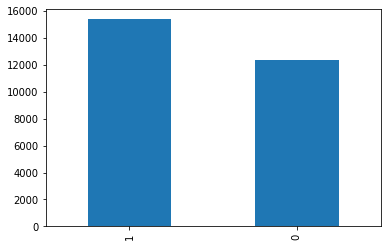

In [8]:
comment_data['label'].value_counts().plot(kind='bar') #data 분포 그래프를 통해서 확인하기

In [9]:
X_data = comment_data['comment']
y_data = comment_data['label']
print('comment 개수: {}'.format(len(X_data)))
print('rating개수: {}'.format(len(y_data)))

comment 개수: 27749
rating개수: 27749


# 불용어 제거 및 토큰화

In [10]:
normalized_text = []
for string in X_data.tolist():
    try:
        tokens = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]+", " ", string.lower())
    except Exception as e:
        print(string)
        break
    normalized_text.append(tokens)
print(normalized_text[:5])

['저 짧은 몇 마디에서 인성이 보이넴 ', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '정신분열 잼 ㅋㅋㅋ', '실력에비해 오래갔다', '거만이 하늘을 찌르네 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가 ']


In [11]:
comment_data.comment = normalized_text
for sentence in comment_data['comment']:
    print(sentence)

저 짧은 몇 마디에서 인성이 보이넴 
개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ
정신분열 잼 ㅋㅋㅋ
실력에비해 오래갔다
거만이 하늘을 찌르네 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가 
점점 왜저러냐 리더라는게 맨날 표정관리 못하고 기분에 따라 행동하고말하는거 진짜 별로다
말하는거 저급해 
말투가 왜저래ㅋㅋ
아무리 그래도 그렇지 말투가 저게 뭐냐 
왜저래 비꼰데 힘들면 그냥 조용히 탈퇴하세요 요즘 보면 얼굴도 어둡고 기분대로 행동하고 표정 다 드러내더만 이제 내리막길 다들 얼굴에 생기가 없고 초심도 잃은거 같고 배부르지 그만하고 쉬어라 다들 팬 많지 금방 썰물처럼 다 휩쓸려간다 너희 아무것도 아니다 배부른 소리하고 자빠졌네 비호감이네 진짜
아무리봐도 잘못 뽑은 것 같다
인기있을때 높은곳에 있을 때 말을 좀 조심할 필요가 있을 거 같네요 표현이 참 
인기도 좋고 다 좋은데 말투가 왜 그래요 어린 팬들도 많은 사람이
진짜 예민하네 
와 좀 깨긴 깬다 스트레스여서 그럴 수도 있는데 그래도 라이브 동영상에서 저런 말을 했다는게 당신이 그 자리에 앉아있는 것도 그런 관심 때문인 것을 ㅉㅉ
윽 진짜 말투 이런다고 
말 더럽게 싸가지 없게 하네ㅋㅋㅋㅋㅋ 니 성격대로 피코짓 하지말고 이제 힘든척 울지마 이 가식덩어리야
멘탈이 상당히 불안정한듯 제발 말과 글을 자제하고 행동을 조심해주길 
맨날 표정관리못하고 기분에따라 행동하고그리고 그만 우세요 
말은 조심히 써야 된다고 본다 그런 말투라면 모든행동이 가식적으로 느껴질거 같다 
어차피 이래저래 이미지 다 망가졌는데 열심히 쉴드 쳐라ㅋㅋㅋㅋㅋㅋ
인성 보소 
요즘 얘네 무슨 특권의식이 이렇게 심한지 모르겠음 회사 인성관리 한다고 하지 않았나 
깨진 건 너 얼굴이다
개돌았네
아 싼티나
언행이 참 가벼워보이네 ㅋㅋ 그렇게 안봤는데 벌레보이면 무시했어야지 똑같이 벌레짓 하고있으니 ㅉ
죽어ㅇㅇ 도움안되는 쓰레기
싸가지 없을거 같네
인기도별로없으면서 
깨진건 너 와꾸뿐 
왜 인기있는지

무식한 년아 대가리에 똥만 들은년
생각을 하고 말해
좀 깨긴한다
아팠노 이기야 
메갈하는거 티내는 애들은 좀 티비에 나오지마라
왜케 쿵쾅대노 이기야 
말투에서 싹수가보이네 퉤
완전 막나가는구나 이럴꺼면 그냥 탈퇴해라 
아주 말버릇이 나빠졌네
인간쓰레기 탈퇴해
진짜 씨발 하다하다 별 
사용하는 단어가 참 저렴하네 ㅡㅡ
미친ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
불쌍ㅉ친구좀 사겨
시집가서 술병이나 분리수거하고 살아라
메갈ㅋㅋ 역겹다
왜 이렇게 예민함 
말 가려서 해 이녀나
저런 말투는 좀 아니지
이래서 수준낮은 애들은 입다물게 해야해
너가 같은얘가 물론 개인취향이지만 젤 별로 아줌마상 뭔가 너가 옥의 티다 ㅎㅎㅋㅋㅋ
얘 싹퉁바가지였네 좋게 생각했는데 
자격지심 대단하네요 
트와이스 대박나자
타팬인데 저 관종이라는 게 그냥 걱정해주는 팬들을 말하는 게 아니잖아 말도 안 되는 추측하는 그냥 키보드 워리어들 말하는거지 기자라는 사람이 논점 파악을 왜 이렇게 못해 ㅋㅋㄱㅋ
좋은말투는 아닌듯하네요
말투만봐도 싸가지없는거 티나네ㅋㅋㅋㅋ악플더먹고도 저렇게 말안하는 연예인이 태반이다 그게 연예인직업인거고
진정한 관종인듯
텅텅
응 손절
염치도 없냐
역겨워 
놀랍지도 않치만 웅앵웅 참 생긴대로 골비었네
임신했냐 
빡통스러운건 진작에 알았지만 소름끼침ㅋㅋㅋㅋ
춤출때 다른 얘들은 뭔가 이쁘고 마음에서 아 상큼해 매력있어 하는데 볼때마다 춤이 과해 가슴이 크다고 다 섹시한건아니란다 조화가 잘되야지 짧고 울륵불륵 아줌마상 
저급한 말투에서 인성 느껴짐 공인인데
욕정내미 떨어짐 없어보여서
대충 그림이 나온다 ㅋㅋ
읔 메갈
역시 페미는 생각이없음
애잔 ㅠㅠ
인성 ㅜㅜ
애초에 인성이 글러먹은애였네ㅠㅠ
초심찾아라 병신년아
너무 예민한듯
진짜 금방 질리게 생긴 타입인듯
지능도 낮은듯 ㅋ
수준이 너무 떨어진다 ㅉㅉㅉ
웅앵웅 쵸키포키 발광질이노 ㅋㅋ 
역겹다 역겨워 
말투싼티 작렬ㅠ
메갈한대요 메갈돌이래 
관둬라 걍
열폭해서 살인해 
말투 왜그러시지
내가 이래서 못생긴애들 시러한다 못생긴애들 치고 꼴페 아닌 애들 거의 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


한심한 년놈들이냐 년들이냐 진짜 꼴값들을 한다
드러워죽겠네 정신병자인가 
뭐냐 이 기 생 들은
ㅁㅊ것들
으 좀 구역질난다 
쥐럴도 풍년이다 진짜 인간이 혐오스럽다 쌍쌍바년아
이그 또 ㄹ ㅏ이들 
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 그냥 둘 다 죽어라
이분들 소식은 부고도 전해줄 필요가 없습니다 
자살하는건 어때 ㅎㅎ
역대최고의 관종 ㅋ 관종의 신계급ㅋ
토나온다 
개더러워ㅠ
토나와
둘다 비정상 한마디로 쇼
비정상적 인간 
역겨워요
나중에 나이먹고 지가한짓생각하면 쪽팔려죽을거다음 글쎄 그런 머리라도될지진짜 이상한 애야
정신병자 집구석 
연병하네
뭐여 역겹네 
염병을 한다 
한녀충 관심받아서 좋니 한강가서 번지하자 추울때 더 빨리 간단다 
보여줄 수 있는 모든 미친짓을 보여주는군
다들 제정신이 아닌듯 
관종 
야 죽으라니까 왜 안죽냐고
갈기갈기 찢어 죽일년아 자살해
쓰레기야 
제정신은 아닌듯 ㅉㅉ
희대의 진상관종
나대지 말고 조용히 놀아라 좀
슬프다 정신이상자의 기사를 보는 내가 
공해수준 
부모도 대단하다 집안망신 시키는 자식을 아직도 품고있네
페미년들 나라 망치네
관종 ㅡㅡ
이런애들이 죽어야하는데 ㄷ
관종이네진짜
이년기사읽을바에 똥개전봇대에 오줌싸는거보는게
미세먼지만으로 공해는 충분하다 
하나같이 다 정신병자들이네
관종 
지랄을해라 지랄을 해
꼴깝들떤다 ㅉㅉ
정신병자들의 일상을 퍼다나르는 
진짜 점심먹으러 가야하는데 토나올꺼같아 미치겠다 대체 왜 기사로 저런 ㅅ관종 기사를 봐야하는지
비 엉 신 레 즈 골패미들 ㅋ
한녀 재기해라
한녀충아
꼴페미 역시나 사이언스 
세번째 사진으로 볼때 손가락 마디마디가 저렇게 멍이 들었다는 건 뭔가를 힘차게 내리쳤을때 나오는거 아닌가 그리고 여자애들 끼리 싸웠는데 둘중에 하나가 일방이라고 
다수가 지저분 찝찝함을 느끼게되는 이런 상황을 자연스럽게 연출해주는 기자도 참 대단하다 한서희 저 관종 어떻게 분리수거 좀 안돼나 
선천적 동성애란 없는 말입니다
관심종자에게 관심 주지 마시오
아 진짜 얼굴 보기 안좋네
진짜 요즘 보기드문 인성쓰레기
한녀가 또오 

ㄷㄷㄷㄷ 조울증인듯 ㄷㄷㄷㄷ
댓글보는 맛에 자꾸 클릭하게됨ㅋㅋㅋ 저 여자가 뭐하는지는 관심없음ㅋ
얘는 뭐가 억울하다고 지 하는거 보니 딱 지가 한대로 돌려받고 있구만은 
소름 오지게 돋는중
치료 좀 받아요 ㅠㅠㅠ
공포영화가 따로 없군
정신과진료를 
너무너무 무섭다
이쯤되니 안타깝다 다내려놓고 정신과 상담 치료 받으시길 
미친것같어
얘도 갈때까지 간듯 
정신과 치료가 필요한듯
덜 떨어진듯 
정신줄 꽉 붙들고 사시길 
누가 병원 좀 넣어줘야될 것 같음 진심 어찌될듯
정상이 아니야
관심을 아주 많이 필요로 하네 과하게 부담스러운 스타일
미저리 같아 음원은 협박용 같아 무서워
눈이 진심 너무 무서워요 ㅠㅠ
심하게 문제있는것 같음 
지금 정신상태가 정상이 아닌거 같은데 기자들은 왜 자꾸 이런걸 기사화하는건지 기자야 제발 월급값좀해라 정상도 아닌애 정말 얼굴보고싶지 않아서 할수없이 댓글을 단다
무서워
정신세계가 이상한거 아닌지 
병원 가야 할듯 
 차원같다는 생각은 줄곧했으나 이렇게 독특할 줄이야 정신줄잘잡고 살길
안하무인 민폐인성인건 확실히 알겠다 
진짜 끊게 해라 주위에 진짜 아무도 없냐 
에효 할말이 없다 저런 셀카 찍어 올리고 싶은지 관종 그차체임 이쁘지도 않고 써클렌즈에 정말보기가 별루네요 
양극성장애자 같다 ㅜㅜ 정상인으로 보이지 않는다 
치료를 받는게 좋을거같어요 가서 약물치료도 받고 정서적으로 마음챙기며 살길 바래요 사람이 힘들면 몰리게되는데 잘 극복하길
미친여자같어
치료가 시급한듯
얘 미친건 아닐까 
다들 힘들게 살고 다들 억울해
ㅋㅋㅋㅋㅋ 난그전부터 얘어떤애인지 알고있었는데 ㅋㅋㅋ ㅋㅋㅋㅋㅋㅋㅋㅋ 모르면좀 싸닥하고있어 멍청한것들아
진짜 추하다ㅋㅋ 주변에 사람도 없나보다 부모라도 말려라 뭐하냐 
주변에 지인없냨ㅋㅋㅋㅋㅋ누가좀 말려봐바
여러분께 마지막 인사 전한다면서요
정신나간 녀언 같아
얘 정상아님
얘 도대체 왜이러는건가요 연예인이 이렇게 관종짓거리 한사람이 있나 ㅡ ㅡ
정말 추잡해 버려서 보기에 거북했는데 정말 많이 사랑 한거같다 겪어보지 않았음 아무도

진짜 이쁘긴 함
탈세연예인 
예쁘다 
여자가 봐도 넘 예쁘다
완전 팔색조
대박 누르자마자 감탄
리즈시절 같아
어떻게 사람이 이렇게 예쁘게 생길 수가 있지 
아 너무 예쁘다
연기도 잘하고 얼굴도 예쁘고 빠지는게 없네 
여자가 봐도 넘 이뻐 
이쁘다
인정하기싫지만 너무예쁘다ㅜㅜ
고급지고 예쁘다 너무 예쁘네
얼렁다는작품에서볼수있으면좋겠습니다 진짜 정말 이뻐요 
나이를 거꾸로 먹는거임 너무 이쁘당 
이쁘다 이뻐서 한참을 보았네 
인정 말해뭐해
항상 이뻐서 매일 리즈잖아요 
이쁘다 저옷 어디꺼지 옷도이쁘네요 
진짜 레알 젤루 이뻐
이젠 원숙미가 나오네 정상이지 
화이팅 ㅠㅠ
하 이 언니 미모 ㅠㅠ 미쳤다
넘 핫한 배우
미인형 인형 
다이쁨
너무 예뻐요 
내 워너비
사랑하는 내배우
왜케 이뻐요 
넘아름다워 
너무이뻐요
와 
겁나 이쁨
내 사룽 
우아하고 고급스런분위기 이뻐요 
내가 너무 사랑해
헉 소리 나죠 미모 끝판왕
뭐야 점점 이뻐져
와 진짜 이쁘다 
진짜 이쁘다 그 중에서도 모든 감정을 표현할 수있는 눈이 정말 최고
사람이야 인형이야 
이목구비 진짜 예쁘다
여신이다 브라운관에서 빨리 만나보고 싶어요
느아쁜 지지배 다 가졌어 다 가졌으 
ㅠㅠ 진짜 완전 넘 이쁘다 
얼굴의 정답
눈코입 다 어쩜 저리 예뻐
어떤 머리를 해도 정말 예뻐요
넘 이쁘고 분위기 좋은데 
완전 예쁘당
진짜 인형이네 
너무 예쁘다
너무 이뻐 
음 역시 이쁘긴하다
변함없이 아름답네요
아직까지는 최고인듯
정말 인형같이 아름답다 ㅋ
유일하게 클로즈업 할수록 이쁜 사람
꾸준히 예쁨 진짜 여신
진짜 질리지도 않고 볼때마다 감탄하는 미모 심지어 화장 안했을때가 더 예쁜듯
나이먹으니 성숙미도 있고 이쁘네요 
진짜 이쁘다란 소리가 절로 나옴
너무예뻐서 비현실적 컴퓨터로그린듯
진짜역대급이다 사진으로 봐도 이렇게 예쁜데 실제로 보면 얼마나 예쁠까 
천사같다 
역시 명불허전 대한민국 탑이네요 
늙지도 않아 반칙이야 진짜 
실물이 그렇게 예뻐서 상대배우들이 반한다는데
뭘해도 이쁘다 
별로 안좋아하는데 이뿐건 인정 이뿌

애들까지 밉상
돼지년들
벌써 갱년기인가 
된장녀였네 결국 자랑할게 가방밖에 없었냐 
가지가지 비호감
기냥 딱 봐도 아주매같은데
김치녀 
이런 된장 
개그맨아내지만 일반인인데 왜 자꾸 나오는지이런 가방자랑질이나하고 이러기전에 인성이되어야하고 애나 잘 키우쇼 여기저기 나외서 꼴보기싫음 이휘재도 마누라 애들 나오게해서 출연료받지말고 이집식구들 제발 조용히있으면좋겠다정말 주는거없이 싫음
아줌마
비호감 
루이비통 협찬받았나보네
뭡니까 이 무슨 대놓고 밉상짓을 하는지 쇼핑백인줄 
열폭
촌스럽네요 
별로 인데 
밉상가족
ㅉㅉ 언제 철들래 
어딜봐서 노인정일세
열폭 대단쓰
명품들고 사진찍으면 명품비주얼인감 
부부는 닮는다더니 너무 이휘재랑 잘어울림
협찬 짤 너무 촌스럽게 찍어서 부작용 
좋게봤는게 없어보임 
얘 이쁜건 모르겠는데 ㅋㅋㅋ
저급하구만 
명품들면 짝퉁같애 ㅋㅋㅋㅋㅋㅋㅋㅋ
어디가 명품비주얼이라는거야
누가 봐도 완전 아줌마야 말도 안되는 소리하네
자랑질이겠지
별 듣보잡 다 기사나오는구나
그리고 때봐도 아줌마예요 
비호감
과하다 
명품을 둘러도 싸구려
하여튼 이 여자 관심병 환자 이럴수록 이휘재는 나락으로 떨어진다는거 모르나 
진짜웃기네요 왜 저러사진이 좋게 안보일듯한데 자기가 연예인인줄 아나봐 진짜 비호감
이렇게유치할수가없다 왠가방자랑
얼굴은 할머니ㅠ가방자랑 
갈수록 비호감이네 ㅉㅉㅉ
부부가 쌍으로 비호감
기력없는 할머니상 서언인가 걔도 문정원 존똑이라 얼굴이 길 어ㅋㅋㅋ
비호감이 드는건 사실입니다 
얘네는 뭘해도 꼴보기싫다 걍싫어 
아 이래서 안티가 많은 거구나 
촌스러운 관종 한심하다 
본인이 싼티
아줌마 같네 주름에
참 꾸준한 관종짓에 대단함을 느낀다 연예인도 아닌 아내 기사좀 그만 내보내라
저 가족은 주는 거 없이 괜히 미움
안이쁘다 
비똥 가방큰거메고 사십대중반 아짐메 처럼보이구만 
참 유치하다ㅋ
골 비어보인다
얼굴졸김 이마빼기는다뱃겨져음훌러덩
비호감
걍 비호감 
저러니 비호감이 많지 
환자복입은줄 
관종
지랄하지마라
비호감질은 여전하네
개못생겼네 ㅋㅋㅋㅋㅋ

사기 ㅋㅋㅋ
이여자보면 으사나리 진짜 훌러덩 깬다ㅜㅜ
나같음 진작 갈라섰다 
그냥 무식한 나대는 여자같음 조용히 있어주는게 남편 도와주는것 같은데
정말 몇몇때문에 보기싫습니다 
이젠 비호감 
쯧쯧
허영심 덩어리들임 있는 사람들이 더 하고 
그만좀 얼굴보기도싫음
한심하고 저급하다 교양은 교육으로만 채워질순없고 환경과 성향 집안 모든게 함께 
실제로도 나대는 느낌 장난아님
연예인남편 빽이 좋은듯
생각은 없고 나대기는 좋아해서 사고치는 피곤한 스타일의 관상
연예인 남편 만났다고 지가 연예인인줄 아는 사람중 한명
엄창할때부터 알아봣음ㅉㅉ 천박하기 그지없음 생긴대로 논다더니
끼리끼리냐 
얘는 대체 몬지 잊을만하면 구설수 지가연앤인줄재섭어제발 기나오지마라 부부가끼리끼리잘만낫네
화면에좀나오지마 서방빽으로 꼴값을한테 너도관종이야 
돈독올랐냐
관종맞네 쌍수도 했네 ㅋㅋㅋ
뜨려고 지랄을 하네
똥칠 ㅋ
작작 좀 했으면 싶다
기본이 없는 사짜가 나대면 일어나는일
극혐
앞으로 짜지세여
얘는 지가 연예인인줄 아나봐 나대지말고 조용히살지
넌 연예인이아냐
챙피함을 모르고 돈에 눈 먼 여자같애
ㅈㄹ
그냥 꺼지세요
사기꾼년
그래서 인성이 제일중요한거여 허영심이 많아보인다 
아줌마 나대지말고 조용히 사쇼 명수도 간당간당한데 잘못하면 한방에 훅 가요
생긴것 부터가 천박해
연예인병이 무서워
관심종자병도 있는것으로 사료됨
의사치곤 머리가 많이 비어보인다 아니 너무 비었다
의사라는 작자가 미쳤네
존나 한심 
꼴뵈기싫다 방송에 그만나와라 라디오에서도 맨날 얼마버냐고 입방정떨더니만 돈을 많이벌고도 욕심이 끝이없구나 추하다 
사진좀 치우세요 보기 시르다
인스타보니까 공주 왕비병이던데
건물도돈굴리면서막사더니 진짜 돈에환장한사람같다
진짜 쓰레기급 애 
아 이년 진짜 보기싫어 니남편얼굴에 똥칠좀 하지마 그지야
우 웩 
왠 ㅈㄹ이야
그리구 못생김
관상은 과학이다 생긴게 벌써 경솔해보이는 얼굴
이여자 비호감이야 의사답지도 않고
남편얼굴에똥칠
ㅉㅉㅉ 말 행동 조심해라 니 남편 믿고 나대지말고
말과 행동이 넘 가벼움


성형중독 ㅜㅠ
눈알 ㅜㅜ
중국여자같이 생김 ㅋ
누구 일반인 기사 메인에 올리지마라 손이 못생기고 울퉁불퉁한 거보니 팔자 쎄겄네 ㅉㅉ
어 음 눈이 무섭 
슈퍼맨 나올때까진 적당했던거 같은데 점점 너무 징그러워 진다 얼굴 ㅠㅠ
좀 천박하게 느껴진다 
정신장애인
얼굴보고 깜놀 ㅡㅡ
제대로 성괴네 ㅋㅋㅋㅋㅋ 지대다 지대
확실히 인조는 인조티가 남 김태희나 조보아는 눈커도 저렇게 안부담스러운데
멧퇘지
얼굴이 넘 징그럽네 ㅠㅠ
인조인간로봇트 ㅋㅋㄷ
썅년
손은 성형 안 되나 보네 반지보다 넘 못 생긴 손이 눈에 똭 
여자 눈 무서워요 
얼굴이 부조화
눈 겁나 무섭네
눈이 무섭다 뛰어나올듯
부담스럽고 징그러워 
다 비호감 
역하네요
관종들
여자 얼굴이 몬가징그러
눈 무셔
아후 지겨워 성괴 
그 외계인 전예지라고 들은거같은데 풍문으로 들었 풉
못생기면 못생겼다
헉 인조인간 
성형미인은 확실하네 
성형 ㅠㅠㅠ
손이 너무 못났다 
사시에다눈쳐짐
아 거의 성형중독 얼굴인데 너무 많이 만진듯 자연스러운게 한개도 없네 솔직히 이뻐보이긴 커녕 이상해보인다 
이런 듣보잡 기사 좀 안썼으면 
횟집가면 파는 개불보다 더 징그럽다 
사람 맞나요 로보트 같은데 부모가 없나
여자분이 그냥 인조인간같네 돈좀 많이 썼겠다 싹 갈아엎었네 
얼굴이 징그럽다 로봇트
사진을 보정한듯 좀 보기 거북
팬이에요 항상 응원해요 
솔직히 비주얼원탑임
아름다우십니다 
연예인 중에 아주아주 드물게 엄청 착하고 예의바르고 순하고 인성갖춘 게다가 외모까지 갖춘 바른 분 
선함 그 자체일듯 
첫인상은 좀 차도녀 느낌인데 알고보면 엄청 순둥이 
정말 저얼굴도 대뷔때랑 달라지질않는구나 우월한 비주얼 이쁘당
예전에 친오빠 동기인데 우리오빠도 이쁘고착하다고했었습니다 뜨고나서 단역인 오빠한테 먼저아는척 해주고 인사하고인성도좋고 이쁘다고 칭찬하더라구요 
참 자연스럽고 이쁘다 마음도 이쁘고
학생같이 이쁘네요 세련된 스타일도 잘 어울리지만 모든 스타일이 다 어울림 
진짜 인성좋음 알바들한테 웃으면서 인사 다 받아주고 나갈때 맛있게 잘먹고 

너무 멋지시네요 
너무 멋지잖아요 너무 멋있잖아요 엉엉엉엉엉엉엉엉마지막 판타자이 팬분과 대화한 내용 말씀해주실때 몇번을 보면서도 너무 울컥하고 눈물이 나요 사실 난 개인적으로 만나고 싶은데 어떡하면 삶이 변화되기만을 바래줄 수 있는지 그분에 그마음이 진정 전해져서 눈물이 나더라고요ㅜ 그후 판타자이 가입했어요 그리곤 얘기거리 볼거리가 정말 많더라고요 애초 찐팬님들에 실제얘기들부터 읽는데 얼마나 부럽고 부럽던지ㅜ 저는 현재 서른일곱 그당시 너무 어렸더라도 티비로 준일님을 못봤던게 한이 될 정도네요 일주일에 한번씩 팬 몇분들과 만남도 가지셨다는데ㅜ
너무 멋진 분 
너무 아름다우신분 ㅠㅠ 근데 어제 그옷고른방 그방에 그옷들은 아닌거같아요 ㅠ 너무안타까웠어요 좋은기획사만나시고 의상협찬도 좋은곳에서받으시고 남은인생 꽃길만걸으시길바래요
너무 아름다워서 눈물나요 
너무 예쁘고 투명하게 아름다운 준일님 행복하세요 
너무 잘봤습니다 항상 응원합니다
너무 좋습니다
너무 좋음 ㅜㅜ여러분들이 나만큼 행복했으면 좋겠어요 멋진말
너무 짧아요 시작하고 조금 있다 끝나네감질나요
너무 풍부한감성의 리더이런분이 진정한 대스타입니다어떤거하나 놓치기 싫네요희망의아이콘친근하고 따뜻하고 강하고 부드럽고 섹시한 리더입니다 
너무나 멋지고 아름다웠던 대 날개가 꺾였던 대 이제 새로운 날개를 달고 훨훨 날게되실거예요 존재감이 너무 뚜렷하고 훌륭하십니다 이런 분들은 잘 될 수 밖에 없거든요
너무너무 좋다 
너무좋았 습니다 
넘 멋있으시구 정말 잘되셨음 좋겠습니다 맘속에 있는 꿈 모두 다 더마니 이루시길 기원할께요 
넘 멋짐
노래나춤도 멋지지만 인터뷰가 참좋은 아티스트예요 내 부족함도 받아들이게되고 용기내어 도전하게도하고 요즘 나 스스로에게 좀 관대해졌음 ㅋㅋㅋㅋ
노래하는 시인이자 철학자 
노래한곡도빠짐없이다 내주시길바랍니다 노래다너무좋아요 퀸노래들으면서 기다리는중 음질좋게부탁드립니다 에게노래부를때 머리스타일이소품 이었다는말에또꽈당 너무멋지신것아닙니까 다음주기대중 길게좀해주길
눈치없는월화수ㅜㅜ 어서목욜이ㅜㅜ 

볼만하다
뜰 줄 알았어요 파이팅
벌칙까지 따라하기는 ㅉㅉㅉㅉㅉㅉ 구린내 
별기대 안하고 그냥 봤는데 남편이랑 둘이서 빵터졌어요 ㅋㅋㅋㅋ 문세윤 하드캐리 ㅋㅋ 넘웃겼음
별기대 안하고 봤는데 잼있더라담주 한번 더 봐야지
별기대안해는데 잼네요
별로 이뿌지도않는 피디 얼굴을 왜자꾸 보여주는지 왜 연예인으로 데뷔하게 ㅋ
보기 불편한 멤버들이 없어서 좋았어요 박 일 이렇게 재미있는 프로였나 싶을 정도로 재밌었어요
보는 내내 웃다보니 시간 순삭 
보는내내 웃었네요 담주가 벌써 기다려짐요 선한 분위기 좋아요 화이팅 
보다가 채널돌림 자막도 진짜 재미없고 오글거림 몇년째 같은 포멧이냐 
보다가 배꼽 빠지는줄 간만에 아무생각없이 넘잼있게 봤습니다 담주가 기대되네요
보조개미남 김선호 하이팅
본격 범죄자 육성 예능 신선하다 
본방봤는데 시간가는줄 모르고 잼있게봤어요응원합니다 
본사람만 댓쓰자 솔직히 생각보다 재미있었다
부모님도 재미없고 망하겠다고 하던데
빠른 편집 진행 괜찮았음 대세인 유튜브 편집따라하는거 괜찮다고봄
빠순이들만 열광하고 프로그램 내용은 식상하고 진부하기 그지없는 까나리 게임을 분 질질끌고 시민겜은 분 편집하고 총체적 난국 개월동안 뭘 연구한건지
뽀시래기 ㅜㅜ이제매주볼수있당
사골예능
산만하지 않고 은근한 재미가 있어요 이런 분위기 좋아요 
상상 그 이하일줄 알았는데 뭔가 신박한 재미가 보였음ㅋㅋㅋㅋㅋㅋ
새 멤버 모두 응원합니다일요일엔 박 일 
새로운 멤버들도 신선하고 재미있네요앞으로 기대됩니다 
새로운 멤버조합이 나쁘지 않네요 오랫만에 보는 박 일 너무 재미있게 봤어요 앞으로 쭉 본방사수 합니다 
새멤버 좋아요 
생각도 못한 조합인데 의외로 괜찮고 예상보다 잼남 의외로 딘딘이 팀에 대한 희생정신이 강하고 라비는 예상대로 음 뭐 잘풀리면 좋을것 같은데 지금까지는 캐리없이 좀 얄미움
생각보다 재미남 조합이 좋음 신선함
생각보다 재밌었어요
생각없이 보고 겁나 웃김 
생각없이봤다가 깔깔대며 웃었음 이조합 뭐지 했는데 신의한수인듯 ㅋㅋㅋ
생각외로 조합 좋으네요 기대합니다 
생

사람이 사람에게 기적이 될 수 있을까 동백꽃필무렵은 내 인생의 기적같은 드라마였다
사람이 살며 느낄수있는 모든 감정을 이 드라마에서 다 느낀것같아요 좋은 작품 만들어주셔서 감사합니다
사회약자들에 대한 편견을 버리고 더 안아주고 사랑해주겠다는 맘을 주시니 공익캠페인보다 낫습니다
삭막하고 막막한 세상 이 드라마 볼때만큼은 잠깐이나마 숨좀쉬고 웃을수 있고 펑펑 울수 있어 진심 좋았음ㅠㅜ이제 뭘 보고 힐링 하나ㅠ
살다가 어느 겨울날 동백꽃을 본다면 드라마 장면장면 생각날 것 같아요아름다운 드라마 만들어주신 작가님 연기하고 고생해주신 스텝분들 배우분들 모두 모두 수고하셨고 감사했습니다 회동안 웃고 울고 행복했네요
살다보니 이런 드라마를 다 보며 행복해했구나 저알 고마워 동백이 만든 모두들 
살면서 보았던 드라마 중 진심 최고였다 작가님 필력에 감탄했고 우리나라에 이런 작가가 있다는게 자랑 스럽다 
살인자를 억지로 불쌍한 캐릭터 안만들어서 더 좋았음 살인자는 그저 살인자일뿐 연민의 대상이 아님 오히려 피해자인 향미가 얼마나 힘들었을지 설명해주고 이웃사촌이였고 죽마고우였고 다 필요없이 나쁜놈 응징하는거 너무 좋았다 
작가님의 인간과 인생에 대한 철학이 담긴 드라마였던거 같아요 어찌보면 드라마에서 많이 쓰이는 상투적인 엄마의 사랑에 대한 주제를 이토록 흥미롭게 쓰시다니 정말 대단하십니다 그리고 현재 사회의 단면을 볼 수 있는 인스타그램 중독자에 대해서도 그 내면을 꿰뚫는 좋은 접근이었던 것 같아요 인스타에선 모두 행복하고 잘 사는 것 같은데 각개전투로 열심히 인생을 헤쳐나가는 것 말이에요 가족 이웃 우리나라 사람들끼리 서로 품어주고 으쌰으쌰하며따뜻하게 살고 싶어 졌어요 좋은 드라마 만들어주셔서 고맙습니다 
새로운 내 인생 드라마네요 참 잘봤습니다 
설정오류 그딴것도 없고 모든 떡밥들이 아귀 딱딱 맞게 완벽하게 회수된 드라마는 처음 본다 작가는 천재중의 천재다 심지어 마저 아주 자연스럽고 감동적으로 녹여냈다 제품들이 등장하지만 억지로 등장시키는게 아닌 자연스럽게 스토리 안에 

또또 못생기고 뚱뚱한것 심술보소
정말 짧다 다리가 
다리도 짧은데 엉 이 너무 쳐졌고 다리도 짧다보니 허벅지가 너무 굵어 암요 운동해야겠어
뜨려고 발악을 하는구나
거짓으로 수당타먹은게 엄청 나대네ㅡㅡ 챙피하지도 않은가벼
관종이신가 한혜진 몸매는 못 따라가니 포기하삼
ㅉㅉㅉ
보기싫음 
참 요란하다
꼴값떤다
새해부터 ㅋㅋ 운동한답시고 올린 사진 본 내눈 어쩔꺼 진짜 현무야 너보다 더 비호다 관리좀 하자
 를 끊으라구 안그럼 계속 이런기사 나오고 관종이라고 경멸밖에 못받는다니까 공부는 잘했을지 모르나 상황파악능력은 부족한가 본인 미운털만 박힌다고 답답하네 참 
열등감에 찌들린 새끼들 진짜 더럽다 더러워언제 정신차릴래
병이다 병 약도 뭣도 없다는 관종병
우리 혜성이 똥짜리하긴 하다
절벽이네
똥싸냐 
뭐가 라인 
볼수록 질린다 전무현처럼 굉장히 질린다
짦다 매력 별로 없음 질린다
극혐무가꽂아주는건지이래저래마이나오네
타고난 체형이 어쩔 수 없을꺼 같은데 
그분 질투심에 좀 부들 부들 대겠는데
애쓴다ㅉㅉ그래도못넘어넘사벽
악플 좀 그만 써요
관종ㅋㅋㅋㅋㅋ 진짜 비호감 되는거 한순간이네ㅋㅋㅋ
추합니다 ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ 아이고 너무 티난다 ㅠㅠ 너무 듣보에 주목 못받고 살던 아무도 모르던 아나운서에서 어쩌다 유명한 사람이랑 사귀면서 이기회에 어떻게든 자기 이름 한번 더 알리고 어떻게든 떠보겠다고 용쓰는거 ㅋㅋㅋㅋㅋ 에휴 왜저러고 살지
음 그래도 몸매는 죽어도 안될걸 ㅋㅋㅋㅋ
어린게 참별루 뜰려고 안달났어 ㅉㅉ 전현무도 완전 비호감됐어ㅜㅜ
비율도 그렇고 다리도 안이뻐서 죽어라해도 예뻐질 몸매는 아님 
그래봤자 한혜진이 어퍼컷 후려치면 바로 기절 
전현무는 여친 일개미 만드는게 특기여 아주 돈독이 그냥 
은근 분위기가 촌스러워 
아이고나 젊은처자가 쫙붙는 레깅스입고 운동하는 사진 올린것중에 젤 볼품없는 사진이네 어쩜 저렇게 볼품이 없냐그래 ㅉㅉㅉ
엄지척 부르는거 봣는데 키 짜리몽땅에 다리는 코끼리인줄 ㅋ 몸매랑 얼굴이 걍 일반인보다 못함
조용히쫌 사귀지 별수도 없구만 왠자

역겹
첩ㄴ ㅕㄴ으로 사는게 행복하니 내가보긴 인생이 넘 불쌍해
사람탈쓰고 짐승만도 못한 인간 악마같은 당신들 눈에 피눈물 날 진심으로 기다려봅니다 아무리 사랑이 어떻고 개인이 어떻더라도 인간된 도리라는게 있는겁니다 
거장이 되기 전에 인간이 되었어야 
재수없다 더러운것들
상간녀
이런 쓰레기들 기사좀 쓰지마라
에라이 카앜퇘
이런게 뭐가 거장이냐 밑바닥 쓰레기에 지나지 않는다
더럽 
역시 거장은 뭐니 더러운것들 이름 중간 하트는 또 뭐고 하트를 이런것들한테 사용하지마라 역겹다 
북치는 놈 장구치는 년 맨날 지둘이 북치고 장구치고 
자기 사생활관리도안되는이를 거장으로 추켜세우는 영화계 ㅋㅋㅋㅋ인성도 같이 따라줘야 거장아닌가 영화만 잘찍어내면 그냥 다 거장이냐 더럽다 그냥 기분이
이건 시킨거다 갑자기 하트 넣은 기사가 도배가 되니 정말 역겨우니 기사 내려라 기자도 돈벌려고 별짓을 다한다 불쌍타
욕도 아깝다
찐사랑이긴해 추잡해서 그렇지 ㅗㅗ
거장이란 표현이 어울리나 수치스럽다
세상이 개막장으로 흘러가네 
이 시국에 개돼지 뉴스까지 봐야하냐
역시 한국 정서에 안맞는 더럽게 느껴지는 커플
토나와
이 거시기들 기사 내지 마라 꼴보기 싫다
불륜계의 두 거장 인간 쓰레기계의 거장으론독보적이지요 꼴보기싫다 더러운것들
기자님 이들의하는것을아름답게포장하지마세요 역겨워요
못되고 못된 가정파괴범 확 마
쓰레기들 소식까지 기사로 봐야되요 
쓰레기는 쓰레기봉투에 
추함 딱 이 두글자로 요약됨
더러운것들
바람펴노코 저리 당당하게 한국에서살다니 둘다 싸이코같네
변태 더러운 위선자 불륜남거장의 뜻을 모르는 기자기자 자격없다
드런것들 ㅉ
발정남녀 이거 영화 제목으로 괜찮지 않나요 ㅋㅋㅋ
얘네들 대한민국 국민이 아니길 바란다
기사도 보기 싫음
대단한 예술 한답시고 저러고 있겠지 역겹다
드러운 인간들 이란 제목으로 영화나 만들어보세요
더러워
이건 누가봐도 불륜이다
그냥더러운불륜
더러운 연 놈들
불륜 
역시 거추장
불륜남녀
거장이래 ㅋㅋㅋㅋㅋㅋ 누가 거장인데 거장은 사람한테나 하는 말이지 사람이아닌데 

아이유 이쁘고 착하당 ㅠㅠ
아이유 이쁘다
아이유 인정 
아이유 자산이 얼마있는지 무지 궁금하네 
아이유 작년에만 억 기부하지 않았나 진짜 멋있다 나도 기부에 해보고 싶다 
아이유 정말 멋지다 
아이유 정말 가슴 따뜻한 사람이다 존경해요 
아이유 정말 나라에제난이있을때마다 많은기부를하는걸로알고있어요 돈있다고다기부하는건아닌데정말고마워요
아이유 정말 멋지네요 큰 도움이 될겁니다
아이유 정말 멋지다 
아이유 정말 존경합니다
아이유 정말 천사다 
아이유 정말 칭찬하지 않을수없네요 부디 도움이 빨리 전달되길
아이유 조아 착하고 이쁘고 노래도 넘 잘하고 응원합니다 감사합니다 짝짝짝 
아이유 존경한다 천재적인 음악성도 이런 선행도
아이유 존경합니다 사랑해요
아이유 존내 멋잇다
아이유 좋아요
아이유 좋은일 많이하네 
아이유 진심 멋지다 나이도 어린데 어쩜 바르고 올곧은 심성을 가졋는지 연예인들의 모범답안이다 이럴때 하정우도 기부라는걸 좀 해보제만
아이유 진짜 꾸준한 기부 대단하다 마음씨 너무 예뻐ㅜㅜㅜ
아이유 진짜 대단하다 매번 
아이유 진짜 대단하다 항상 느끼지만
아이유 진짜 대단해요 ㅠㅠ
아이유 진짜 마음씨가 천사같다 
아이유 진짜 멋있다 
아이유 진짜 멋있다 베풀 줄 아는 사람 ㅠㅠ 더 오래오래 좋아할거야
아이유 진짜 멋져요 대구 경북 위해 노력하시는 의료진도 감사합니다 대한민국의 대구 경북을 위해 다들 응원해 주세요 
아이유 진짜 멋지다
아이유 진짜 멋지다ㅠㅠ 
아이유 진짜 멋진 사람이다 닮고싶어 ㅠㅠㅠ 감사합니다
아이유 진짜 못하는게 모니 ㅋㅋㅋ 진짜 대단하다 ㅋㅋ
아이유 진짜 생각이 깊다 보통 사회적 약자만 생각하는데 지원나선 의사들까지 생각하다니 대단하다 아이유나 수지나 올해만 몇번째 기부인지 진짜 꾸준히 하는 연예인들 어리지만 본받을만하다 
아이유 진짜 짱 
아이유 진짜 착하다
아이유 집방향 어디죠 절하고싶네요
아이유 짱
아이유 짱 멋있다 마스크값으로 사기 치는 사기꾼들도 넘쳐나는데 아이유 보고 배우세요ㅡㅡ
아이유 짱 복받으세요
아이유 짱 얼굴도 이쁘고 마음씨도

In [12]:
stopwords=['의','가','이','은','들','는','가수','연기','걍','과','도','를','으로','자','에','와','한','하다','배우','가수','와','배그','박지훈','연우','드라마','작가','노래']#불용어 제거하기

In [13]:
from konlpy.tag import Okt  
okt = Okt()

In [14]:
X_token=[]
for sentence in comment_data['comment']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    #temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_token.append(temp_X)

In [15]:
print(X_token[:3])

[['저', '짧다', '몇', '마디', '에서', '인성', '이', '보이', '넴'], ['개념', '없다', '원래', '도', '비호감', '이다', '하다', '행동', '이나', '말투', '밉다', '상', '그', '자체', 'ㅋㅋㅋㅋㅋ'], ['정신분열', '잼', 'ㅋㅋㅋ']]


# 정수 인코딩 수행

In [16]:
max_words = 35000
tokenizer = Tokenizer(num_words = max_words) # 상위 35,000개의 단어만 보존
tokenizer.fit_on_texts(X_token) 
X_token = tokenizer.texts_to_sequences(X_token)

In [17]:
print(X_token[:3])

[[53, 708, 723, 1809, 66, 118, 2, 344, 7653], [408, 17, 474, 3, 157, 13, 1, 366, 181, 318, 284, 254, 57, 300, 285], [4095, 1052, 88]]


In [18]:
word_to_index = tokenizer.word_index

In [19]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 13961


# 전체 데이터 길이 분포 확인

train 리뷰의 최대 길이 : 124
리뷰의 평균 길이 : 9.280154239792425


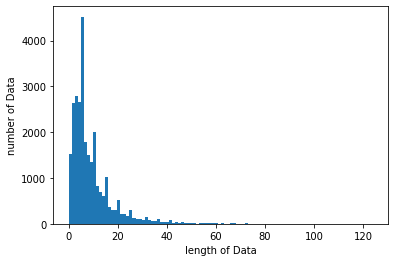

In [20]:
print('train 리뷰의 최대 길이 :',max(len(l) for l in X_token))
print('리뷰의 평균 길이 :',sum(map(len, X_token))/len(X_token))
plt.hist([len(s) for s in X_token], bins=100)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [21]:
max_len = 124
X_data = pad_sequences(X_token, maxlen=max_len)
print("data shape: ", X_data.shape)

data shape:  (27749, 124)


In [22]:
y_data = np.array(y_data).reshape(-1, 1)

In [23]:
print(type(X_data))
print(type(y_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
print(X_data[:3])
print(y_data[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0   53  708  723 1809   66  118    2  344 7653]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
 

# 데이터 분리

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.1, random_state=1234)

In [26]:
print(X_train[:3])
print(y_train[:3]) 

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0  1185    74
      1  4691   164   662]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0    

# activation = ReLU 추가(loss: 0.2791 - acc: 0.9391)

In [27]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(64, 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.1)

Train on 22476 samples, validate on 2498 samples
Epoch 1/10
22476/22476 [==============================] - 147s 7ms/sample - loss: 0.2818 - acc: 0.8990 - val_loss: 0.1778 - val_acc: 0.9384
Epoch 2/10
22476/22476 [==============================] - 144s 6ms/sample - loss: 0.1495 - acc: 0.9481 - val_loss: 0.1593 - val_acc: 0.9412
Epoch 3/10
22476/22476 [==============================] - 149s 7ms/sample - loss: 0.1204 - acc: 0.9576 - val_loss: 0.1544 - val_acc: 0.9432
Epoch 4/10
22476/22476 [==============================] - 155s 7ms/sample - loss: 0.1100 - acc: 0.9614 - val_loss: 0.1402 - val_acc: 0.9464
Epoch 5/10
22476/22476 [==============================] - 180s 8ms/sample - loss: 0.0973 - acc: 0.9652 - val_loss: 0.1476 - val_acc: 0.9508
Epoch 6/10
22476/22476 [==============================] - 178s 8ms/sample - loss: 0.0897 - acc: 0.9698 - val_loss: 0.1390 - val_acc: 0.9476
Epoch 7/10
22476/22476 [==============================] - 174s 8ms/sample - loss: 0.0869 - acc: 0.9716 - val_lo

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         3500000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 3,631,937
Trainable params: 3,631,937
Non-trainable params: 0
______________________________________________

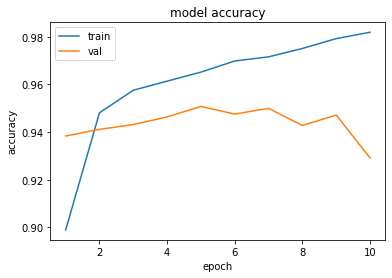

In [30]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

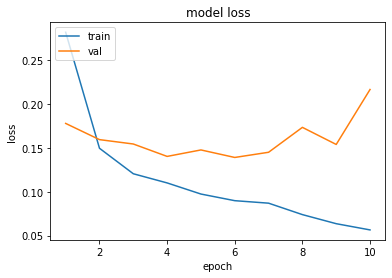

In [31]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

2775/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [34]:
model.save('C:\\Users\\user\\Documents\\GitHub\\grad_project\\model\\model11.h5')